<a href="https://colab.research.google.com/github/Chetan265/heart_disease_predition/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics;import warnings
from sklearn.metrics import classification_report

In [81]:
warnings.filterwarnings("ignore")

In [82]:
df = pd.read_csv("/content/drive/MyDrive/Chetan/dataset/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [83]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [84]:
#renaming the variable male into gnder
df= df.rename(columns = {"male":"gender"})

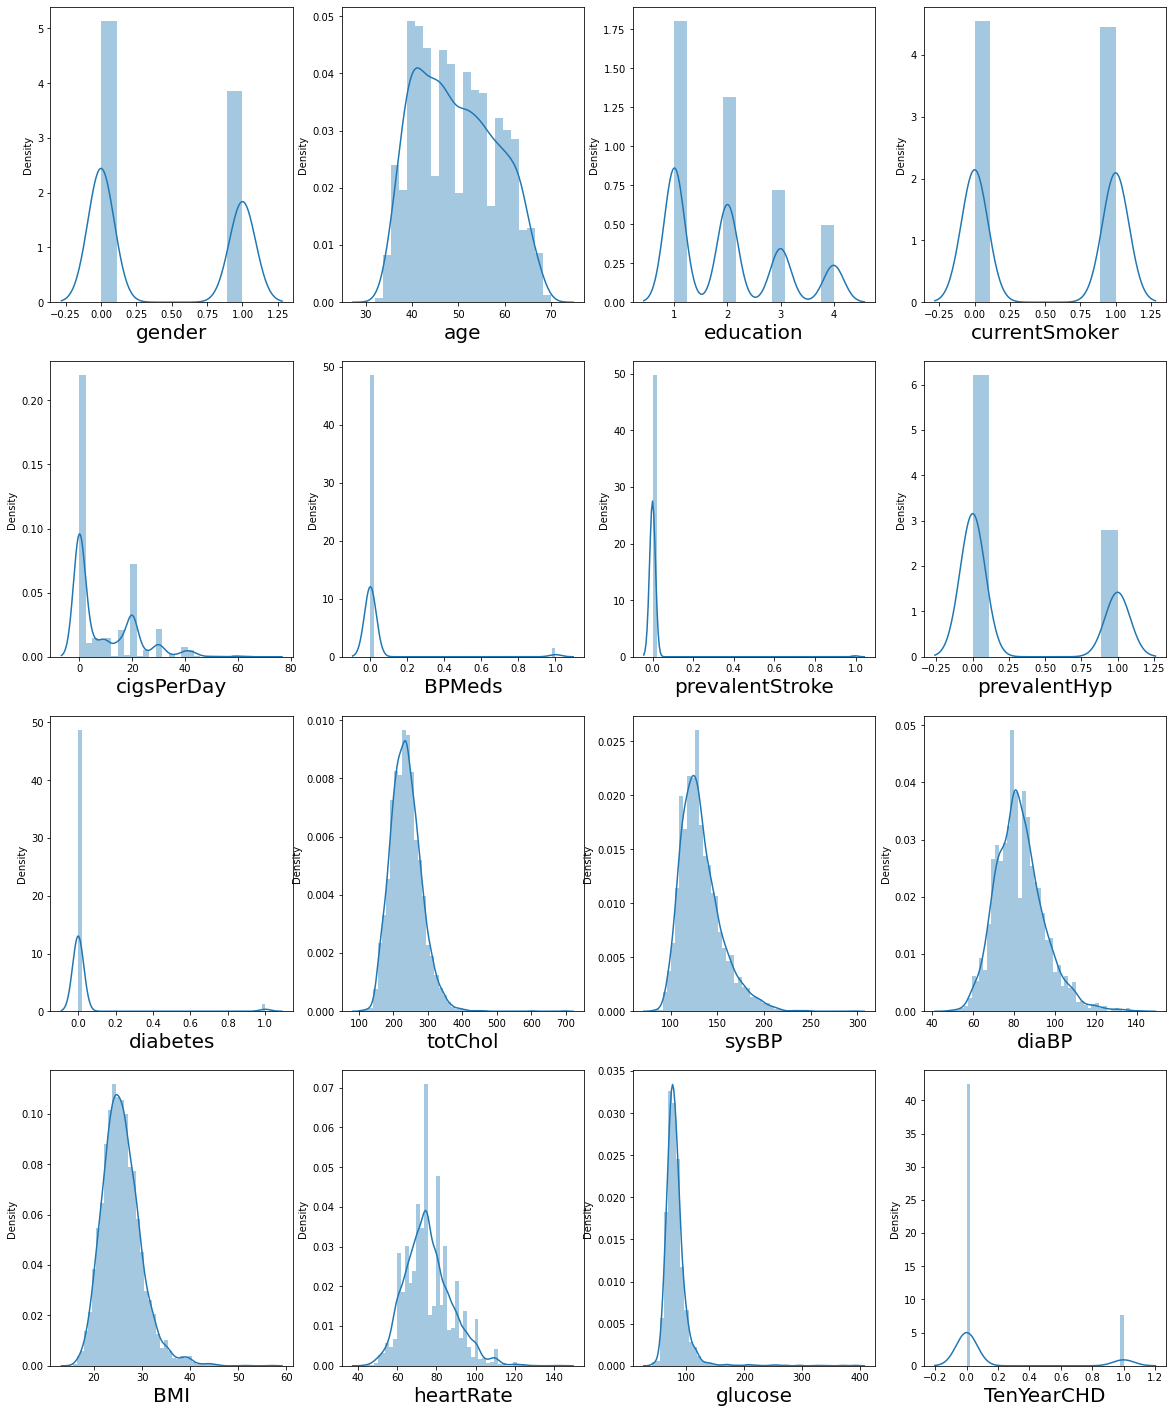

In [85]:
#Distribution of each column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :     # as there are 16 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sb.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [86]:
#null values in the data
df.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [87]:
# null value treatment
df.education = df.education.fillna(df.education.median())
df.cigsPerDay = df.cigsPerDay.fillna(df.cigsPerDay.median())
df.BPMeds = df.BPMeds.fillna(df.BPMeds.mean())
df.totChol = df.totChol.fillna(df.totChol.mean())
df.BMI = df.BMI.fillna(df.BMI.mean())
df.heartRate = df.heartRate.fillna(df.heartRate.mean())
df.glucose = df.glucose.fillna(df.glucose.mean())

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


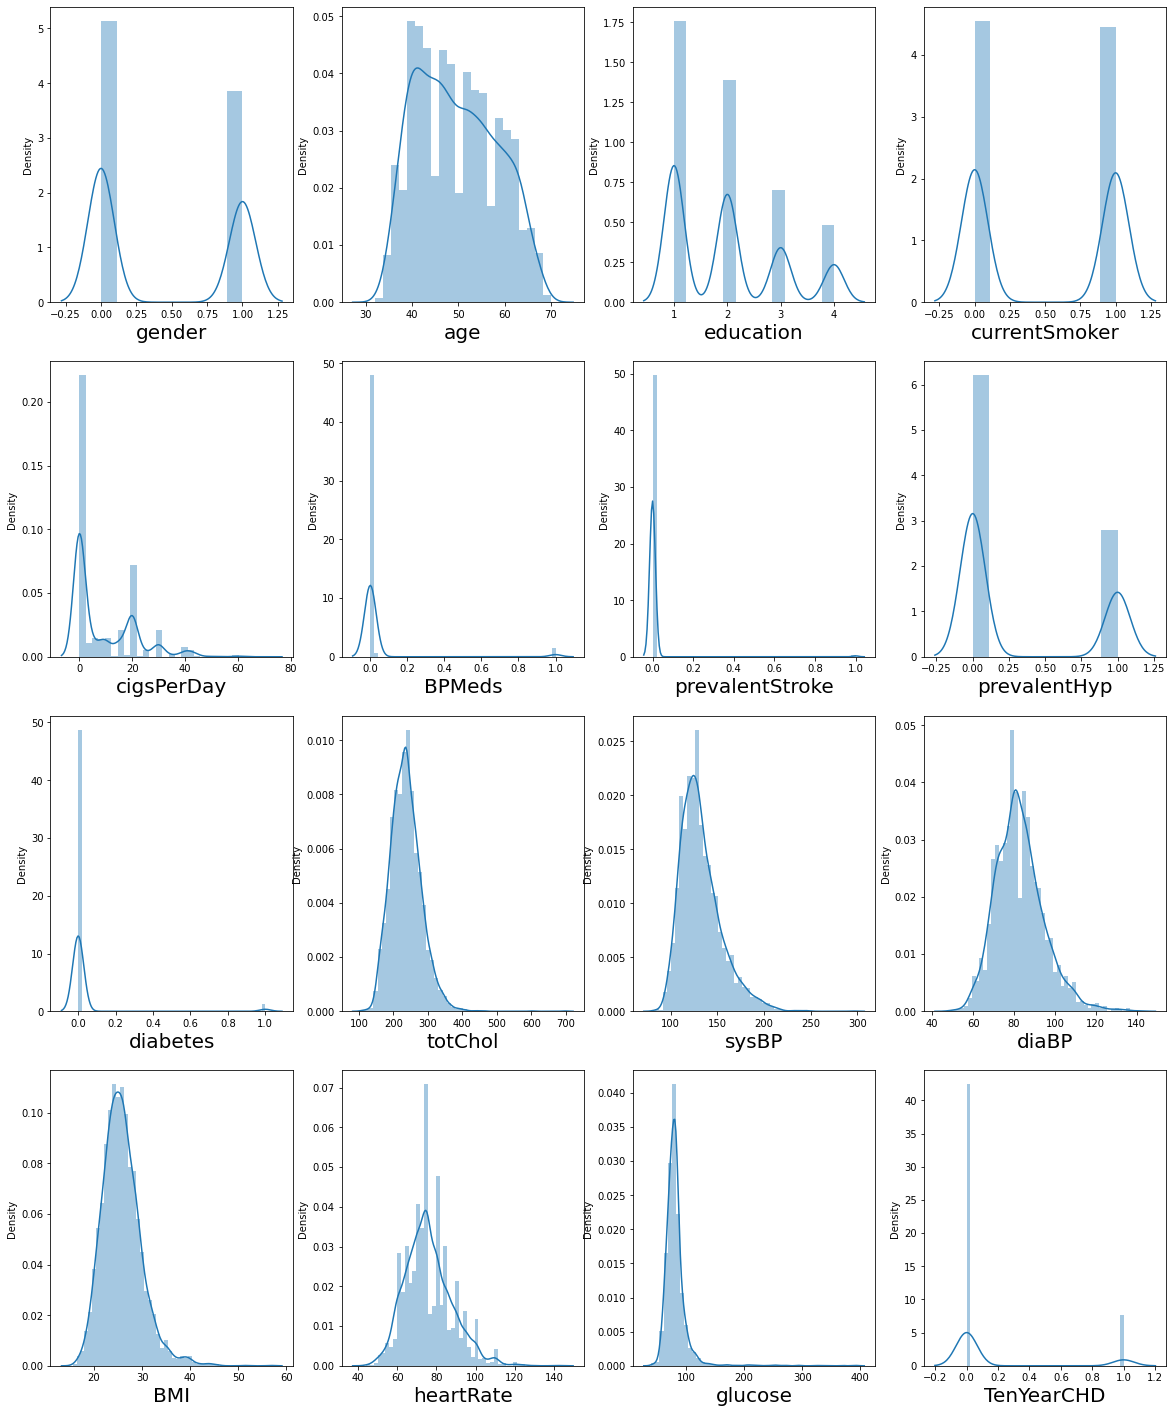

In [89]:
#ditribution of the columns after the null value treatment 
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :     # as there are 16 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sb.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [90]:
#Correlation between the variables
df.corr()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1.000000,-0.028979,0.017205,0.197596,0.315630,-0.052204,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.163547,-0.213748,-0.191847,0.121980,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
education,0.017205,-0.163547,1.000000,0.018273,0.007618,-0.010610,-0.035150,-0.081021,-0.038136,-0.022479,-0.128273,-0.061719,-0.135518,-0.053700,-0.033700,-0.053383
currentSmoker,0.197596,-0.213748,0.018273,1.000000,0.760239,-0.048632,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.315630,-0.191847,0.007618,0.760239,1.000000,-0.044826,-0.032244,-0.065046,-0.036150,-0.026816,-0.088375,-0.056687,-0.092332,0.073866,-0.056650,0.058859
BPMeds,-0.052204,0.121980,-0.010610,-0.048632,-0.044826,1.000000,0.115003,0.259243,0.051571,0.078909,0.252047,0.192490,0.099552,0.015175,0.048905,0.086774
prevalentStroke,-0.004546,0.057655,-0.035150,-0.032988,-0.032244,0.115003,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.081021,-0.103260,-0.065046,0.259243,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.038136,-0.044295,-0.036150,0.051571,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.260270,-0.022479,-0.046285,-0.026816,0.078909,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624


In [91]:
y = df["TenYearCHD"] # target variable
X= df.drop(columns = ["TenYearCHD"]) #independent variables

In [92]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [93]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_new,y_new=smk.fit_sample(X,y)

In [94]:
X_new.shape,y_new.shape

((7136, 15), (7136,))

In [95]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

Original dataset shape Counter({0: 3594, 1: 644})
Resampled dataset shape Counter({0: 3568, 1: 3568})


In [96]:
X = X_new
y = y_new

In [97]:
#splitting data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state = 101)

In [98]:
#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [99]:
#Logistic regression
log_reg = LogisticRegression();log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
#fitting logistic regression
log_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
y_pred = log_reg.predict(X_test);y_pred #pridicting y variable

array([0, 0, 0, ..., 1, 1, 1])

In [102]:
conf_mat = confusion_matrix(Y_test,y_pred);conf_mat #confusion matrix

array([[538, 358],
       [280, 608]])

In [103]:
accuracy = accuracy_score(Y_test,y_pred)
accuracy

0.6423766816143498

In [104]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.60      0.63       896
           1       0.63      0.68      0.66       888

    accuracy                           0.64      1784
   macro avg       0.64      0.64      0.64      1784
weighted avg       0.64      0.64      0.64      1784



In [105]:
from sklearn.metrics import roc_curve,roc_auc_score

In [106]:
# Area Under Curve
auc = roc_auc_score(Y_test, y_pred) #Area under curve
auc

0.6425655566280567

In [107]:
# y prediction probability
y_pred_prob = log_reg.predict_proba(X_test)
y_pred_prob

array([[0.69064525, 0.30935475],
       [0.80123211, 0.19876789],
       [0.57040044, 0.42959956],
       ...,
       [0.36497043, 0.63502957],
       [0.46836555, 0.53163445],
       [0.38082543, 0.61917457]])

In [108]:
fpr,tpr,thresholds = roc_curve(Y_test,y_pred_prob[:,1])

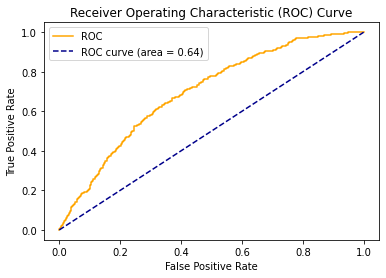

0.6425655566280567


In [109]:
# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(Y_test, y_pred))

# Decision Tree

In [110]:
#importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [111]:
dt = DecisionTreeClassifier(random_state=265)
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)

1.0

In [112]:
y_pred_dt = dt.predict(X_test);y_pred_dt

array([1, 0, 1, ..., 0, 1, 0])

In [113]:
conf_mat_dt = confusion_matrix(Y_test,y_pred_dt);conf_mat_dt #confusion matrix

array([[728, 168],
       [149, 739]])

In [114]:
accuracy_dt = accuracy_score(Y_test,y_pred_dt);accuracy_dt

0.8223094170403588

In [115]:
print(classification_report(Y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       896
           1       0.81      0.83      0.82       888

    accuracy                           0.82      1784
   macro avg       0.82      0.82      0.82      1784
weighted avg       0.82      0.82      0.82      1784



In [116]:
auc_dt = roc_auc_score(Y_test, y_pred_dt) #Area under curve
auc_dt

0.8223536036036037

In [117]:
# y prediction probability
y_pred_prob_dt = dt.predict_proba(X_test)
y_pred_prob_dt

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [118]:
y_pred_prob_dt[:,1]

array([1., 0., 1., ..., 0., 1., 0.])

In [119]:
fpr,tpr,thresholds = roc_curve(Y_test,y_pred_prob_dt[:,1])

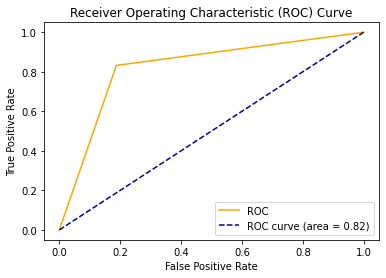

In [120]:
# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_dt)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Hyper parameter tuning

In [121]:
leaves = [1,2,4,5,10,20,30,40,80,100]

In [122]:
grid_param_dt = {
    'criterion': ['gini', 'entropy'],
    'max_features' : ['auto','log2'],
    'min_samples_leaf':leaves
}

In [123]:
grid_search = GridSearchCV(estimator=dt,param_grid=grid_param_dt,cv=5,n_jobs =-1,verbose = 3)

In [124]:
grid_search.fit(X_train,Y_train)
grid_search.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


{'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 1}

In [125]:
dt1 = DecisionTreeClassifier(criterion = 'entropy', max_features = 'auto', min_samples_leaf = 1)
dt1.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [126]:
y_pred_dt1 = dt1.predict(X_test);y_pred_dt1

array([0, 0, 1, ..., 1, 0, 0])

In [127]:
conf_mat_dt1 = confusion_matrix(Y_test,y_pred_dt1);conf_mat_dt1 #confusion matrix

array([[733, 163],
       [139, 749]])

In [128]:
accuracy_dt1 = accuracy_score(Y_test,y_pred_dt1);accuracy_dt1

0.8307174887892377

In [129]:
print(classification_report(Y_test,y_pred_dt1))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       896
           1       0.82      0.84      0.83       888

    accuracy                           0.83      1784
   macro avg       0.83      0.83      0.83      1784
weighted avg       0.83      0.83      0.83      1784



In [130]:
## Area Under Curve
auc_dt1 = roc_auc_score(Y_test, y_pred_dt1) #Area under curve
auc_dt1

0.8307744128056629

In [131]:
# y prediction probability
y_pred_prob_dt1 = dt1.predict_proba(X_test)
y_pred_prob_dt1

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [132]:
y_pred_prob_dt1[:,1]

array([0., 0., 1., ..., 1., 0., 0.])

In [133]:
fpr_dt1,tpr_dt1,thresholds_dt1 = roc_curve(Y_test,y_pred_prob_dt1[:,1])

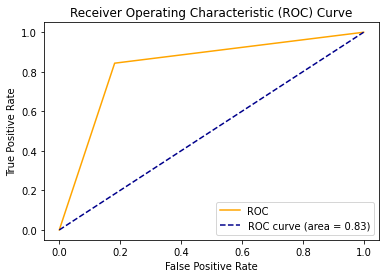

In [134]:
# ROC curve
plt.plot(fpr_dt1, tpr_dt1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_dt1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Random Forest

In [135]:
rand_for = RandomForestClassifier(random_state=265)
rand_for.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=265,
                       verbose=0, warm_start=False)

In [136]:
y_pred_rand = rand_for.predict(X_test)
y_pred_rand

array([1, 0, 1, ..., 1, 0, 0])

In [137]:
conf_mat_rand = confusion_matrix(Y_test,y_pred_rand);conf_mat_rand

array([[845,  51],
       [109, 779]])

In [138]:
accuracy_rand_for = accuracy_score(Y_test,y_pred_rand);accuracy_rand_for

0.9103139013452914

In [139]:
print(classification_report(Y_test,y_pred_rand))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       896
           1       0.94      0.88      0.91       888

    accuracy                           0.91      1784
   macro avg       0.91      0.91      0.91      1784
weighted avg       0.91      0.91      0.91      1784



In [140]:
## Area Under Curve
auc_rand = roc_auc_score(Y_test, y_pred_rand) #Area under curve
auc_rand

0.9101663046975547

In [141]:
# y prediction probability
y_pred_prob_rand = rand_for.predict_proba(X_test)
y_pred_prob_rand

array([[0.31, 0.69],
       [0.93, 0.07],
       [0.33, 0.67],
       ...,
       [0.33, 0.67],
       [0.75, 0.25],
       [0.7 , 0.3 ]])

In [142]:
y_pred_prob_rand[:,1]

array([0.69, 0.07, 0.67, ..., 0.67, 0.25, 0.3 ])

In [143]:
fpr_rand,tpr_rand,thresholds_rand = roc_curve(Y_test,y_pred_prob_rand[:,1])

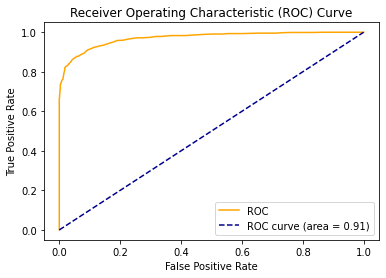

0.9101663046975547


In [144]:
# ROC curve
plt.plot(fpr_rand, tpr_rand, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_rand)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(Y_test, y_pred_rand))

## Tuning

In [145]:
grid_param_rand = {
    "n_estimators" : [10,20,30,40],
    'criterion': ['gini', 'entropy'],
    'max_features' : ['auto','log2']
}

In [146]:
grid_search = GridSearchCV(estimator=rand_for,param_grid=grid_param_rand,cv=5,n_jobs =-1,verbose = 3)

In [147]:
grid_search.fit(X_train,Y_train)
grid_search.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   14.1s finished


{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 40}

In [148]:
rand_for1 = RandomForestClassifier(criterion = "entropy", max_features = "auto", n_estimators = 40)

rand_for1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [149]:
y_pred_rand1 = rand_for1.predict(X_test)
y_pred_rand1

array([1, 0, 1, ..., 1, 0, 0])

In [150]:
conf_mat_rand1 = confusion_matrix(Y_test,y_pred_rand1);conf_mat_rand1 #confusion matrix

array([[839,  57],
       [111, 777]])

In [151]:
accuracy_rand_for1 = accuracy_score(Y_test,y_pred_rand1);accuracy_rand_for1

0.905829596412556

In [152]:
print(classification_report(Y_test,y_pred_rand1))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       896
           1       0.93      0.88      0.90       888

    accuracy                           0.91      1784
   macro avg       0.91      0.91      0.91      1784
weighted avg       0.91      0.91      0.91      1784



In [153]:
## Area Under Curve
auc_rand1 = roc_auc_score(Y_test, y_pred_rand1) #Area under curve
auc_rand1

0.9056919642857143

In [154]:
# y prediction probability
y_pred_prob_rand1 = rand_for1.predict_proba(X_test)
y_pred_prob_rand1

array([[0.225, 0.775],
       [0.925, 0.075],
       [0.375, 0.625],
       ...,
       [0.35 , 0.65 ],
       [0.875, 0.125],
       [0.575, 0.425]])

In [155]:
y_pred_prob_rand1[:,1]

array([0.775, 0.075, 0.625, ..., 0.65 , 0.125, 0.425])

In [156]:
fpr_rand1,tpr_rand1,thresholds_rand1 = roc_curve(Y_test,y_pred_prob_rand1[:,1])

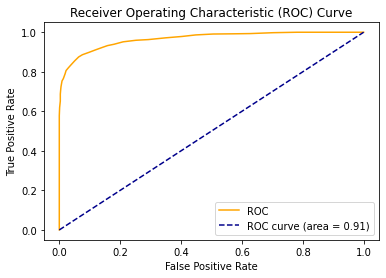

0.9056919642857143


In [157]:
# ROC curve
plt.plot(fpr_rand1, tpr_rand1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_rand1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(Y_test, y_pred_rand1))

## Ada Boost

In [158]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [159]:
ada = AdaBoostClassifier(random_state = 265)
ada.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=265)

In [160]:
y_pred_ada = ada.predict(X_test);y_pred_ada

array([1, 0, 0, ..., 1, 0, 0])

In [161]:
conf_mat_ada = confusion_matrix(Y_test,y_pred_ada);conf_mat_ada

array([[813,  83],
       [195, 693]])

In [162]:
accuracy_ada = accuracy_score(Y_test,y_pred_ada);accuracy_ada

0.844170403587444

In [163]:
print(classification_report(Y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       896
           1       0.89      0.78      0.83       888

    accuracy                           0.84      1784
   macro avg       0.85      0.84      0.84      1784
weighted avg       0.85      0.84      0.84      1784



In [164]:
## Area Under Curve
auc_ada = roc_auc_score(Y_test, y_pred_ada);auc_ada #Area under curve

0.8438857384169883

In [165]:
# y prediction probability
y_pred_prob_ada = ada.predict_proba(X_test);y_pred_prob_ada


array([[0.49338202, 0.50661798],
       [0.51520676, 0.48479324],
       [0.50713787, 0.49286213],
       ...,
       [0.4912323 , 0.5087677 ],
       [0.5058912 , 0.4941088 ],
       [0.50197308, 0.49802692]])

In [166]:
y_pred_prob_ada[:,1]

array([0.50661798, 0.48479324, 0.49286213, ..., 0.5087677 , 0.4941088 ,
       0.49802692])

In [167]:
fpr_ada,tpr_ada,thresholds_ada = roc_curve(Y_test,y_pred_prob_ada[:,1])

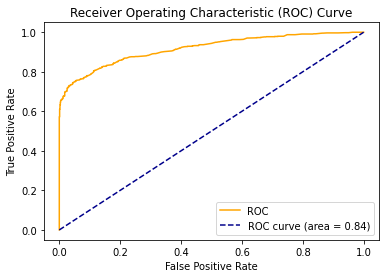

0.8438857384169883


In [168]:
# ROC curve
plt.plot(fpr_ada, tpr_ada, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_ada)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(Y_test, y_pred_ada))

## Parameter Tuning

In [169]:
grid_param_ada={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}

In [170]:
ada.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [171]:
grid_search_ada = GridSearchCV(estimator=ada,param_grid=grid_param_ada,cv=5,n_jobs =-1,verbose = 3)

In [172]:
grid_search_ada.fit(X_train,Y_train)
grid_search_ada.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.5min finished


{'learning_rate': 0.1, 'n_estimators': 2000}

In [173]:
ada1 = AdaBoostClassifier( n_estimators = 2000,learning_rate = 0.1)

In [174]:
ada1.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=2000, random_state=None)

In [175]:
y_pred_ada1 = ada1.predict(X_test)
y_pred_ada1

array([1, 0, 0, ..., 1, 0, 0])

In [176]:
conf_mat_ada1 = confusion_matrix(Y_test,y_pred_ada1);conf_mat_ada1 #confusion matrix

array([[843,  53],
       [183, 705]])

In [177]:
accuracy_rand_ada1 = accuracy_score(Y_test,y_pred_ada1);accuracy_rand_ada1

0.8677130044843049

In [178]:
print(classification_report(Y_test,y_pred_ada1))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       896
           1       0.93      0.79      0.86       888

    accuracy                           0.87      1784
   macro avg       0.88      0.87      0.87      1784
weighted avg       0.88      0.87      0.87      1784



In [179]:
## Area Under Curve
auc_ada1 = roc_auc_score(Y_test, y_pred_ada1);auc_ada1

0.8673835666023166

In [180]:
# y prediction probability
y_pred_prob_ada1 = ada1.predict_proba(X_test);y_pred_prob_ada1

array([[0.49730419, 0.50269581],
       [0.50960229, 0.49039771],
       [0.50212898, 0.49787102],
       ...,
       [0.49591378, 0.50408622],
       [0.50186135, 0.49813865],
       [0.50107437, 0.49892563]])

In [181]:
fpr_ada1,tpr_ada1,thresholds_ada1 = roc_curve(Y_test,y_pred_prob_ada1[:,1])

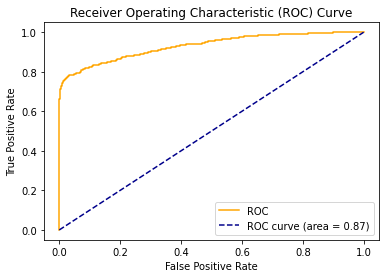

0.8673835666023166


In [182]:
# ROC curve
plt.plot(fpr_ada1, tpr_ada1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_ada1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(Y_test, y_pred_ada1))

## Gradient Boosting

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
gb = GradientBoostingClassifier(random_state = 265)
gb.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=265, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [185]:
y_pred_gb = gb.predict(X_test);y_pred_gb

array([1, 0, 0, ..., 1, 0, 0])

In [186]:
conf_mat_gb = confusion_matrix(Y_test,y_pred_gb);conf_mat_gb

array([[850,  46],
       [180, 708]])

In [187]:
accuracy_gb = accuracy_score(Y_test,y_pred_gb);accuracy_gb

0.8733183856502242

In [188]:
print(classification_report(Y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       896
           1       0.94      0.80      0.86       888

    accuracy                           0.87      1784
   macro avg       0.88      0.87      0.87      1784
weighted avg       0.88      0.87      0.87      1784



In [189]:
## Area Under Curve
auc_gb = roc_auc_score(Y_test, y_pred_gb);auc_gb #Area under curve

0.8729790057915059

In [190]:
# y prediction probability
y_pred_prob_gb = gb.predict_proba(X_test);y_pred_prob_gb

array([[0.20831665, 0.79168335],
       [0.95061907, 0.04938093],
       [0.83886851, 0.16113149],
       ...,
       [0.04596568, 0.95403432],
       [0.84457498, 0.15542502],
       [0.70567086, 0.29432914]])

In [191]:
fpr_gb,tpr_gb,thresholds_gb = roc_curve(Y_test,y_pred_prob_gb[:,1])

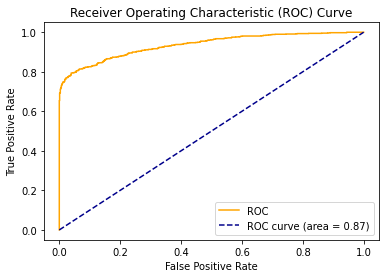

0.8729790057915059


In [192]:
# ROC curve
plt.plot(fpr_gb, tpr_gb, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_gb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(Y_test, y_pred_gb))

## Hyper parameter tuning

In [193]:
grid_param_gb={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}

In [194]:
grid_search_gb = GridSearchCV(estimator=gb,param_grid=grid_param_gb,cv=5,n_jobs =-1,verbose = 3)

In [195]:
grid_search_gb.fit(X_train,Y_train)
grid_search_gb.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.3min finished


{'learning_rate': 0.1, 'n_estimators': 1000}

In [196]:
gb1 = GradientBoostingClassifier( n_estimators = 1000,learning_rate = 0.1);gb1
gb1.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [197]:
y_pred_gb1 = gb1.predict(X_test);y_pred_gb1

array([1, 0, 1, ..., 1, 0, 0])

In [198]:
conf_mat_gb1 = confusion_matrix(Y_test,y_pred_gb1);conf_mat_gb1

array([[840,  56],
       [166, 722]])

In [199]:
accuracy_gb1 = accuracy_score(Y_test,y_pred_gb1);accuracy_gb1

0.875560538116592

In [200]:
print(classification_report(Y_test,y_pred_gb1))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       896
           1       0.93      0.81      0.87       888

    accuracy                           0.88      1784
   macro avg       0.88      0.88      0.88      1784
weighted avg       0.88      0.88      0.88      1784



In [201]:
## Area Under Curve
auc_gb1 = roc_auc_score(Y_test, y_pred_gb1);auc_gb1

0.8752815315315315

In [202]:
y_pred_prob_gb1 = gb1.predict_proba(X_test);y_pred_prob_gb1

array([[0.00573128, 0.99426872],
       [0.97283543, 0.02716457],
       [0.4799066 , 0.5200934 ],
       ...,
       [0.01270297, 0.98729703],
       [0.96669598, 0.03330402],
       [0.84527566, 0.15472434]])

In [203]:
fpr_gb1,tpr_gb1,thresholds_gb1 = roc_curve(Y_test,y_pred_prob_gb1[:,1])

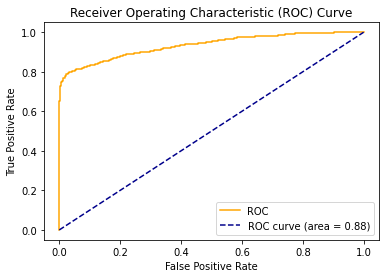

0.8752815315315315


In [204]:
# ROC curve
plt.plot(fpr_gb1, tpr_gb1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_gb1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(Y_test, y_pred_gb1))

## XG Boosting

In [205]:
import xgboost as xgb
from xgboost import XGBClassifier

In [206]:
xgb = XGBClassifier(random_state=265)
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=265,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [207]:
y_pred_xgb = xgb.predict(X_test);y_pred_xgb

array([1, 0, 0, ..., 1, 0, 0])

In [208]:
conf_mat_xgb = confusion_matrix(Y_test, y_pred);conf_mat_xgb

array([[538, 358],
       [280, 608]])

In [209]:
accuracy_xgb = accuracy_score(Y_test,y_pred_xgb);accuracy_xgb

0.8699551569506726

In [210]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.60      0.63       896
           1       0.63      0.68      0.66       888

    accuracy                           0.64      1784
   macro avg       0.64      0.64      0.64      1784
weighted avg       0.64      0.64      0.64      1784



In [211]:
auc_xgb = roc_auc_score(Y_test,y_pred_xgb);auc_xgb

0.8696157094594594

In [212]:
y_pred_prob_xgb = xgb.predict_proba(X_test);y_pred_prob_xgb

array([[0.17126644, 0.82873356],
       [0.94951457, 0.05048542],
       [0.83009523, 0.16990478],
       ...,
       [0.03821117, 0.96178883],
       [0.859123  , 0.14087704],
       [0.70438564, 0.2956144 ]], dtype=float32)

In [213]:
fpr_xgb,tpr_xgb,thresholds_xgb = roc_curve(Y_test,y_pred_prob_xgb[:,1])

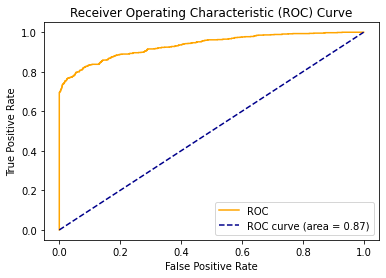

0.8696157094594594


In [214]:
# ROC curve
plt.plot(fpr_xgb, tpr_xgb, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(Y_test, y_pred_xgb))

## Hyper parameter Tuning

In [215]:
grid_param_xgb={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}

In [216]:
grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=grid_param_xgb,cv=5,n_jobs =-1,verbose = 3)

In [217]:
grid_search_xgb.fit(X_train,Y_train)
grid_search_xgb.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.4min finished


{'learning_rate': 0.1, 'n_estimators': 1000}

In [218]:
xgb1 = XGBClassifier( n_estimators = 1000,learning_rate = 0.1);xgb1
xgb1.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [219]:
y_pred_xgb1 = xgb1.predict(X_test);y_pred_xgb1

array([1, 0, 1, ..., 1, 0, 0])

In [220]:
conf_mat_xgb1 = confusion_matrix(Y_test,y_pred_xgb1);conf_mat_xgb1

array([[846,  50],
       [161, 727]])

In [221]:
accuracy_xgb1 = accuracy_score(Y_test,y_pred_xgb1);accuracy_xgb1

0.8817264573991032

In [222]:
print(classification_report(Y_test,y_pred_xgb1))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       896
           1       0.94      0.82      0.87       888

    accuracy                           0.88      1784
   macro avg       0.89      0.88      0.88      1784
weighted avg       0.89      0.88      0.88      1784



In [223]:
auc_xgb1 = roc_auc_score(Y_test,y_pred_xgb1);auc_xgb1 

0.8814450611325612

In [224]:
y_pred_prob_xgb1 = xgb1.predict_proba(X_test);y_pred_prob_xgb1

array([[0.01652926, 0.98347074],
       [0.9793345 , 0.02066551],
       [0.228657  , 0.771343  ],
       ...,
       [0.01096165, 0.98903835],
       [0.96028304, 0.03971694],
       [0.8419216 , 0.15807839]], dtype=float32)

In [225]:
fpr_xgb1,tpr_xgb1, thresholds_xgb1 = roc_curve(Y_test,y_pred_prob_xgb1[:,1])

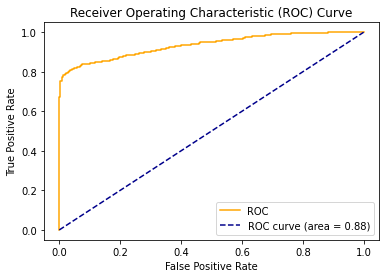

0.8814450611325612


In [226]:
# ROC curve
plt.plot(fpr_xgb1, tpr_xgb1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_xgb1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(Y_test, y_pred_xgb1))

## KNN

In [227]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [228]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [229]:
y_pred_knn = knn.predict(X_test)

In [230]:
knn.score(X_train,Y_train)

0.8636023916292974

In [231]:
conf_mat_knn = confusion_matrix(Y_test,y_pred_knn);conf_mat_knn

array([[568, 328],
       [ 26, 862]])

In [232]:
accuracy_knn = accuracy_score(Y_test,y_pred_knn);accuracy_knn

0.8015695067264574

In [233]:
auc_knn = roc_auc_score(Y_test,y_pred_knn);auc_knn

0.8023246460746459

In [234]:
y_pred_prob_knn = knn.predict_proba(X_test);y_pred_prob_knn

array([[0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       ...,
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4]])

In [235]:
fpr_knn,tpr_knn,thresholds_knn = roc_curve(Y_test,y_pred_prob_knn[:,1])

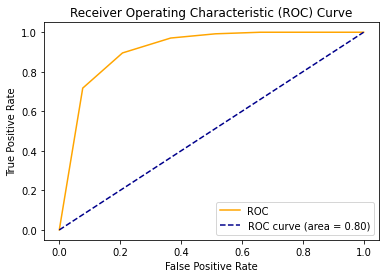

0.8023246460746459


In [236]:
# ROC curve
plt.plot(fpr_knn, tpr_knn, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(Y_test, y_pred_knn))

## Hyper parameter tuning

In [237]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [238]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [ ]:
gridsearch.fit(X_train,Y_train)


In [240]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 3}

In [241]:
#use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn1 = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =3)
knn1.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [242]:
y_pred_knn1 = knn1.predict(X_test);y_pred_knn1

array([1, 0, 1, ..., 1, 0, 0])

In [243]:
conf_mat_knn1 = confusion_matrix(Y_test,y_pred_knn1);conf_mat_knn1

array([[609, 287],
       [ 14, 874]])

In [244]:
accuracy_knn1 = accuracy_score(Y_test,y_pred_knn1);accuracy_knn1

0.8312780269058296

In [245]:
print(classification_report(Y_test,y_pred_knn1))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80       896
           1       0.75      0.98      0.85       888

    accuracy                           0.83      1784
   macro avg       0.87      0.83      0.83      1784
weighted avg       0.87      0.83      0.83      1784



In [246]:
auc_knn1 = roc_auc_score(Y_test,y_pred_knn1);auc_knn1

0.8319608671171171

In [247]:
y_pred_prob_knn1 = knn1.predict_proba(X_test);y_pred_prob_knn1

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       ...,
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333]])

In [248]:
fpr_knn1,tpr_knn1,thresholds_knn1 = roc_curve(Y_test,y_pred_prob_knn1[:,1])

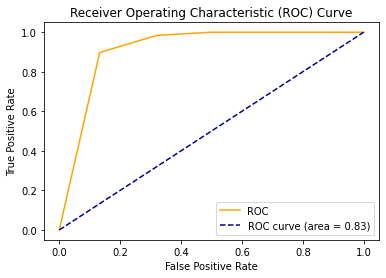

0.8319608671171171


In [249]:
# ROC curve
plt.plot(fpr_knn1, tpr_knn1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_knn1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(Y_test, y_pred_knn1))

## Stacking

In [250]:
# let's divide our dataset into training set and hold out set by 50%
train,val_train,test,val_test = train_test_split(X,y,test_size=0.5, random_state= 355)

In [251]:
# let's split the training set again into training and test dataset 
x_train,x_test,y_train,y_test =  train_test_split(train,test,test_size=0.2, random_state= 355)

In [252]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [253]:
log_reg = LogisticRegression(random_state = 265)
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=265, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [254]:
gb = GradientBoostingClassifier(random_state = 265)
gb.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=265, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [255]:
rf = RandomForestClassifier(random_state = 265)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=265,
                       verbose=0, warm_start=False)

In [256]:
predict_val1 = knn.predict(val_train)
predict_val2 = rf.predict(val_train)
predict_val3 = gb.predict(val_train)
predict_val4 = log_reg.predict(val_train)

In [257]:
predict_val = np.column_stack((predict_val1,predict_val2,predict_val3,predict_val4))
predict_val

array([[0, 1, 1, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 1, 1],
       [1, 0, 0, 1]])

In [258]:
predict_test1 = knn.predict(x_test)
predict_test2 = rf.predict(x_test)
predict_test3 = gb.predict(x_test)
predict_test4 = log_reg.predict(x_test)

In [259]:
predict_test = np.column_stack((predict_test1,predict_test2,predict_test3,predict_test4))
predict_test

array([[1, 0, 0, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       ...,
       [1, 0, 0, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 1]])

In [260]:
xgb_clf = XGBClassifier()
xgb_clf.fit(predict_val,val_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [261]:
xgb_clf.score(predict_test,y_test)

0.896358543417367

## Naive Bayes

In [262]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [263]:
y_pred_naive = naive.predict(X_test);y_pred_naive

array([0, 0, 0, ..., 0, 0, 0])

In [264]:
conf_mat_naive = confusion_matrix(Y_test,y_pred_naive);conf_mat_naive

array([[758, 138],
       [557, 331]])

In [265]:
accuracy_naive = accuracy_score(Y_test,y_pred_naive);accuracy_naive 

0.6104260089686099

In [266]:
print(classification_report(Y_test,y_pred_naive))

              precision    recall  f1-score   support

           0       0.58      0.85      0.69       896
           1       0.71      0.37      0.49       888

    accuracy                           0.61      1784
   macro avg       0.64      0.61      0.59      1784
weighted avg       0.64      0.61      0.59      1784



In [267]:
auc_naive = roc_auc_score(Y_test,y_pred_naive);auc_naive

0.6093649453024452

In [268]:
y_pred_prob_naive = naive.predict_proba(X_test);y_pred_prob_naive

array([[0.83672722, 0.16327278],
       [0.99789026, 0.00210974],
       [0.98655121, 0.01344879],
       ...,
       [0.79913625, 0.20086375],
       [0.98280731, 0.01719269],
       [0.92149662, 0.07850338]])

In [269]:
fpr_naive,tpr_naive, thresholds_naive = roc_curve(Y_test,y_pred_prob_naive[:,1])

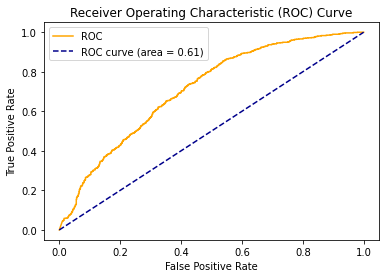

0.6093649453024452


In [270]:
# ROC curve
plt.plot(fpr_naive, tpr_naive, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_naive)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(Y_test, y_pred_naive))

## SVM

In [271]:
from sklearn.svm import SVC

In [272]:
sv=SVC(probability = True, random_state = 265)
sv.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=265, shrinking=True, tol=0.001,
    verbose=False)

In [273]:
y_pred_sv = sv.predict(X_test);y_pred_sv

array([1, 0, 0, ..., 0, 0, 1])

In [274]:
accuracy_score(Y_test,y_pred_sv)

0.6647982062780269

In [275]:
conf_mat_sv = confusion_matrix(Y_test,y_pred_sv);conf_mat_sv

array([[538, 358],
       [240, 648]])

In [276]:
print(classification_report(Y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       896
           1       0.64      0.73      0.68       888

    accuracy                           0.66      1784
   macro avg       0.67      0.67      0.66      1784
weighted avg       0.67      0.66      0.66      1784



In [277]:
auc_sv = roc_auc_score(Y_test,y_pred_sv);auc_sv

0.6650880791505792

In [278]:
y_pred_prob_sv = sv.predict_proba(X_test);y_pred_prob_sv

array([[0.44640561, 0.55359439],
       [0.87499841, 0.12500159],
       [0.76409443, 0.23590557],
       ...,
       [0.60878018, 0.39121982],
       [0.63580057, 0.36419943],
       [0.44287529, 0.55712471]])

In [279]:
fpr_sv, tpr_sv,thresolds_sv = roc_curve(Y_test,y_pred_prob_sv[:,1])

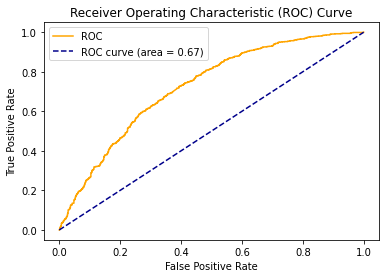

0.6650880791505792


In [280]:
# ROC curve
plt.plot(fpr_sv, tpr_sv, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_sv)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(Y_test, y_pred_sv))

In [281]:
param_grid={'C':[0.1,1,0.2,0.5],'gamma':[1,0.5,00.001]}

In [282]:
grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

In [283]:
grid.fit(X_train,Y_train)
grid.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   49.9s finished


{'C': 1, 'gamma': 0.001}

In [284]:
sv1 = SVC(C = 1,kernel = 'rbf',gamma = 0.001,probability = True)
sv1.fit(X_train,Y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [285]:
y_pred_sv1 = sv1.predict(X_test);y_pred_sv1

array([1, 0, 0, ..., 1, 0, 1])

In [286]:
accuracy_score(Y_test,y_pred_sv1)

0.7634529147982063

In [287]:
conf_mat_sv1 = confusion_matrix(Y_test,y_pred_sv1);conf_mat_sv1

array([[623, 273],
       [149, 739]])

In [288]:
print(classification_report(Y_test,y_pred_sv1))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       896
           1       0.73      0.83      0.78       888

    accuracy                           0.76      1784
   macro avg       0.77      0.76      0.76      1784
weighted avg       0.77      0.76      0.76      1784



In [289]:
auc_sv1 = roc_auc_score(Y_test,y_pred_sv1);auc_sv1

0.7637598536036037

In [290]:
y_pred_prob_sv1 = sv1.predict_proba(X_test);y_pred_prob_sv1

array([[0.18899005, 0.81100995],
       [0.92732155, 0.07267845],
       [0.83371886, 0.16628114],
       ...,
       [0.22166363, 0.77833637],
       [0.8552163 , 0.1447837 ],
       [0.31900643, 0.68099357]])

In [291]:
fpr_sv1,tpr_sv1,thresholds_sv1 = roc_curve(Y_test,y_pred_prob_sv1[:,1])

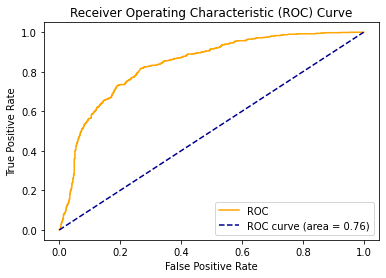

0.7637598536036037


In [292]:
# ROC curve
plt.plot(fpr_sv1, tpr_sv1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_sv1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(Y_test, y_pred_sv1))